# Light Curve Demo

Here we will demonstrate the data model for a typical light curve file and examine the light curve itself.

In [1]:
# Download a single light curve from the star Pi Mensae
import lightkurve as lk
sr = lk.search_lightcurve("pi men", sector=1, author="spoc")
lc = sr.download(download_dir=".")

## About the Light Curves

`LightCurve` objects have several columns, but the two main columns are `time` and `flux`, which show how the target's brightness changes with time. 

There are several flux options available, which represent different levels of processing. The simplest for TESS light curves is the Simple Aperture Photometry flux, `sap_flux`, but the default flux is the Pre-search Data Conditioned SAP flux (`pdcsap_flux`), which has an extra layer of processing to remove low-frequency signal. 

In [2]:
lc

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1325.2969604950604,1.4641956e+06,1.3036719e+02,1.2319778e-03,70445,1630.67624,260.67540,1.4354926e+06,1.2776145e+02,3.9114688e+03,1.5351995e+01,1.4641956e+06,1.3036719e+02,0,———,———,———,———,1630.67624,8.4099076e-05,260.67540,1.3968609e-04,9.0913408e-02,-7.2966635e-02
1325.2983493645327,1.4643365e+06,1.3035809e+02,1.2319590e-03,70446,1630.64880,260.63392,1.4357199e+06,1.2775254e+02,3.8596919e+03,1.5269516e+01,1.4643365e+06,1.3035809e+02,0,———,———,———,———,1630.64880,8.4054744e-05,260.63392,1.3961994e-04,6.2022530e-02,-1.0871942e-01
1325.299738234005,1.4643485e+06,1.3035931e+02,1.2319401e-03,70447,1630.64806,260.62840,1.4356588e+06,1.2775373e+02,3.8692920e+03,1.5291610e+01,1.4643485e+06,1.3035931e+02,0,———,———,———,———,1630.64806,8.4062471e-05,260.62840,1.3959571e-04,6.1673984e-02,-1.1394957e-01
1325.301127103477,1.4643674e+06,1.3035008e+02,1.2319213e-03,70448,1630.64752,260.61434,1.4356190e+06,1.2774468e+02,3.8398132e+03,1.5262703e+01,1.4643674e+06,1.3035008e+02,0,———,———,———,———,1630.64752,8.4045743e-05,260.61434,1.3958366e-04,6.0909923e-02,-1.2573890e-01
1325.3025159730657,1.4642560e+06,1.3034836e+02,1.2319025e-03,70449,1630.64057,260.61412,1.4355810e+06,1.2774299e+02,3.8384204e+03,1.5262712e+01,1.4642560e+06,1.3034836e+02,0,———,———,———,———,1630.64057,8.4043444e-05,260.61412,1.3952980e-04,5.3837594e-02,-1.2532526e-01
1325.303904842538,1.4644681e+06,1.3035623e+02,1.2318837e-03,70450,1630.63971,260.61326,1.4358005e+06,1.2775071e+02,3.8069717e+03,1.5240330e+01,1.4644681e+06,1.3035623e+02,0,———,———,———,———,1630.63971,8.4056861e-05,260.61326,1.3949080e-04,5.2977830e-02,-1.2562653e-01
1325.3052937121265,1.4643586e+06,1.3035381e+02,1.2318649e-03,70451,1630.64385,260.60708,1.4356219e+06,1.2774834e+02,3.8431169e+03,1.5283619e+01,1.4643586e+06,1.3035381e+02,0,———,———,———,———,1630.64385,8.4062158e-05,260.60708,1.3951714e-04,5.7222184e-02,-1.3051888e-01
1325.3066825815986,1.4643564e+06,1.3035527e+02,1.2318461e-03,70452,1630.64220,260.61215,1.4356771e+06,1.2774977e+02,3.8419392e+03,1.5270525e+01,1.4643564e+06,1.3035527e+02,0,———,———,———,———,1630.64220,8.4041087e-05,260.61215,1.3955019e-04,5.5443291e-02,-1.2712292e-01


Now let's plot the light curve. First we'll look at the full sector (27 day) light curve, then we'll zoom in on an interesting feature. We'll examine both the PDCSAP and SAP fluxes.

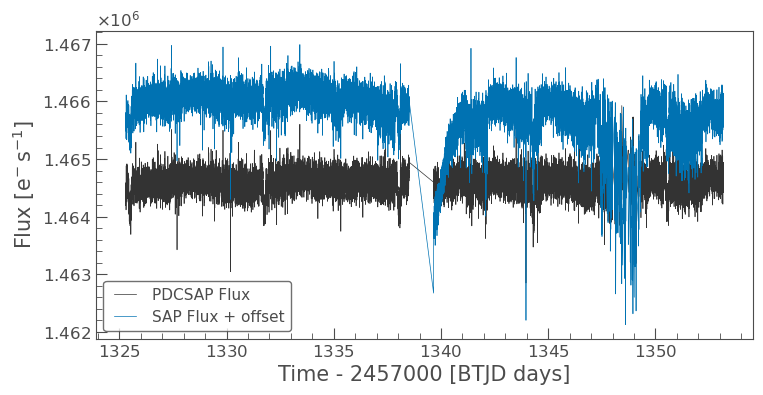

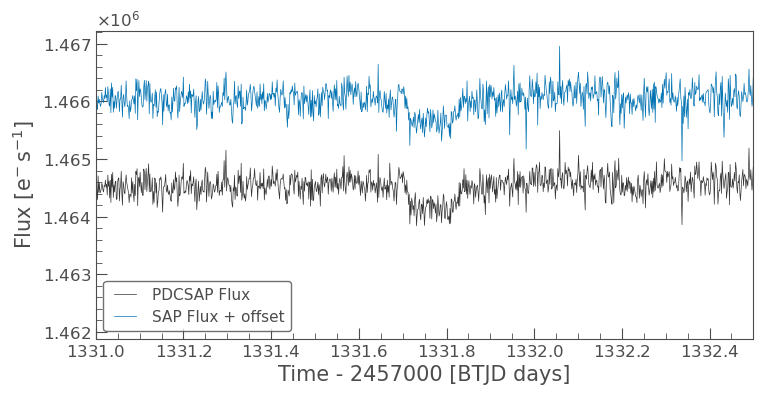

In [3]:
%matplotlib inline
ax1 = lc.plot(label="PDCSAP Flux")
lc.select_flux("sap_flux").plot(ax=ax1, offset=3e4, label="SAP Flux + offset")

ax2 = lc.plot(label="PDCSAP Flux")
lc.select_flux("sap_flux").plot(ax=ax2, offset=3e4, label="SAP Flux + offset")

ax2.set_xlim(1331, 1332.5);

The SPOC light curves have a sampling frequency of two minutes and 27 days duration, so they have nearly 20,000 samples each. Pi Men has a transiting exoplanet, which we can see in the zoomed in panel as a short-lived dip in the flux.

## Light Curve FITS Files

MAST stores light curves in FITS files, which have a ton of ancilliary and meta data about the light curve observations. For SPOC light curves, the file has three HDUs: the primary, the light curve table, and an image HDU showing the aperture used to create the light curve from the Target Pixel File (TPF).

In [4]:
from astropy.io import fits

hdu = fits.open(lc.filename)
hdu.info()

Filename: ./mastDownload/TESS/tess2018206045859-s0001-0000000261136679-0120-s/tess2018206045859-s0001-0000000261136679-0120-s_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   20076R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 21)   int32   


The primary HDU header includes information on the observation time, target sky coordinates, data processing pipeline, and target physical parameters

In [5]:
hdu[0].header

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2020-09-13'         / file creation date.                            
TSTART  =    1325.294877306360 / observation start time in BTJD                 
TSTOP   =    1353.177760209343 / observation stop time in BTJD                  
DATE-OBS= '2018-07-25T19:03:

## Light Curve Products and Pipelines

A single target might have several light curve products for a given observation, which vary in processing, sampling frequency, scientific scope, etc.

For our TESS example, here are the different light curves available just for the first sector:

In [6]:
sr = lk.search_lightcurve("pi men", sector=1)
sr

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,261136679,0.0
1,TESS Sector 01,2018,TESS-SPOC,1800,261136679,0.0
2,TESS Sector 01,2018,QLP,1800,261136679,0.0
3,TESS Sector 01,2018,TASOC,120,261136679,0.0
4,TESS Sector 01,2018,GSFC-ELEANOR-LITE,1800,261136679,0.0
5,TESS Sector 01,2018,TASOC,1800,261136679,0.0
6,TESS Sector 01,2018,TASOC,1800,261136679,0.0


Pi Men's TESS sector 1 observations have 7 light curves products available from MAST alone. There are two products made from the 2-minute cadence observations and 5 from the 30-minute cadence observations. Among the 30-minute cadence data, the 5 products are from 4 different light curve teams, and each product has at least two available flux columns. This means there are many, many choices to make when constructing a similarity search database. From the most restrictive (e.g., the database contains just the PDCSAP flux from the 2-minute SPOC light curves) to the most inclusive (all flux columns from all data products), there is a spectrum of options.

Let's make one last plot of a few different light curves to see how much they differ *just* across processing pipelines. So we'll look at the first sector, 30-minute cadence data from the TESS-SPOC, GSFC-ELEANOR-LITE, and TASOC Ensemble pipeline. Same observations, just different processing.

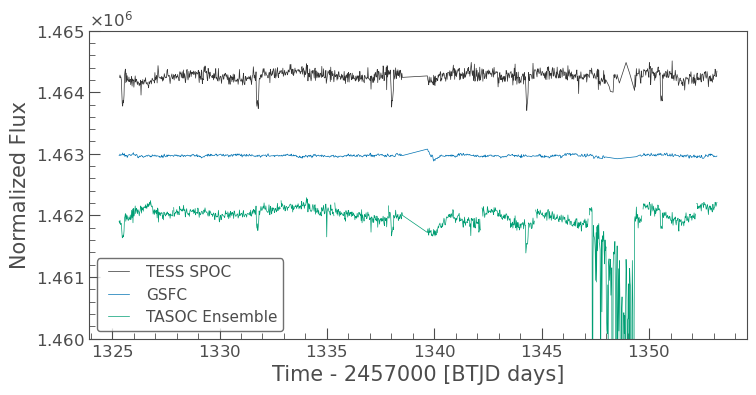

In [7]:
lcs = sr[[1, 4, 6]].download_all(download_dir=".")
lc1, lc2, lc3 = lcs

ax = lc1.plot(label="TESS SPOC")
lc2.plot(ax=ax, label="GSFC", offset=1.258e6)
lc3.plot(ax=ax, label="TASOC Ensemble", offset=1.462e6)

ax.set_ylim(1.460e6, 1.465e6);

Despite being based on the same observations, the three light curves differ greatly. The TESS-SPOC light curve has some noise as well as lower-frequency modulation (~5 day sinusoidal), but the GSFC light curve is nearly flat in comparison. The TASOC light curve has the same noise level as the TESS-SPOC curve, but it has more jump systematics and retains bad-quality cadences that the other pipelines reject.

## Summary

We've examined some light curves to see
- their primary function,
- how their files are constructed, and
- how light curves from the same observation vary between processing pipelines.

For one set of observations there might be as many as 10 different light curves depending on the sampling frequency, processing pipeline, and flux column used.

We haven't yet looked at different representations and transformations that might be useful for a similarity search. Some examples are simple Fourier transforms, time-varying or Short-Time Fourier transforms (STFT), and wavelets. These methods could be used to represent both the frequency-amplitude and phase information contained in a light curve. 